# **Introduction**
Novo AAU Inc a Copenhagen-based pharmaceutical, recently conducted a study on potential treatments for squamous cell carcinoma, a common type of skin cancer. The study involved 249 mice with SCC tumors, each receiving one of several drug regimens over a 45-day period. As part of the analysis team, I was tasked with comparing the efficacy of Capomulin, the companys drug of interest, against other treatments by analyzing tumor development data.

# Task 1: Before beginning the analysis, check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.•	Before beginning the analysis, check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.

Importing library

In [1]:
import pandas as pd # Importing pandas and using pd to use library
import matplotlib.pyplot as plt # Importing matplotlib and using plt to use library
from scipy.stats import linregress # from scipy import linregress

Importing Study results and Mouse metadata csv files, named study_df and metadata_df

In [3]:
# Loading csv file from colab files and named study_df
study_df = pd.read_csv("Study_results.csv")
# Loading csv file colab files and named metadata_df
metadata_df = pd.read_csv("Mouse_metadata.csv")

First we find the duplicate mouse ID and Timepoint

In [7]:
# Identify all rows where both 'Mouse ID' and 'Timepoint' appear more than once
duplicates = study_df[study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
# Arrange the duplicate entries by 'Mouse ID' and then by 'Timepoint' for easier inspection
duplicates_sorted = duplicates.sort_values(by=['Mouse ID', 'Timepoint'])
# Display the duplicated records
print(duplicates_sorted)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
107      g989          0           45.000000                 0
137      g989          0           45.000000                 0
329      g989          5           48.786801                 0
360      g989          5           47.570392                 0
620      g989         10           51.745156                 0
681      g989         10           49.880528                 0
815      g989         15           51.325852                 1
869      g989         15           53.442020                 0
950      g989         20           55.326122                 1
1111     g989         20           54.657650                 1


Identify and extract all duplicate mouse IDs, exclude them from the dataset, and save the cleaned results as a new CSV file.

In [8]:
# Identify IDs from mouse ID with duplicate timepoint data
duplicate_ids = duplicates['Mouse ID'].unique()

# Exclude these mice from the main dataset
clean_study_df = study_df[~study_df['Mouse ID'].isin(duplicate_ids)]

# Save the cleaned dataset to a new file
clean_study_df.to_csv("Clean_Study_results.csv", index=False)

# Task 2: Use the cleaned data for the remaining steps.
# Task 3: Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

In [9]:
# Merge cleaned tumor data with mouse metadata
Clean_Study_results = pd.merge(clean_study_df, metadata_df, on="Mouse ID")

# Generate summary statistics for tumor volume by treatment and calculating mean, median, variance, standard deviation and SEM.
summary_stats = Clean_Study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Std_Dev="std",
    SEM="sem"
).round(2) #rounds up to 2 decimal
# Display statistics
print(summary_stats)

               Mean  Median  Variance  Std_Dev   SEM
Drug Regimen                                        
Capomulin     40.68   41.56     24.95     4.99  0.33
Ceftamin      52.59   51.78     39.29     6.27  0.47
Infubinol     52.88   51.82     43.13     6.57  0.49
Ketapril      55.24   53.70     68.55     8.28  0.60
Naftisol      54.33   52.51     66.17     8.13  0.60
Placebo       54.03   52.29     61.17     7.82  0.58
Propriva      52.32   50.45     43.85     6.62  0.54
Ramicane      40.22   40.67     23.49     4.85  0.32
Stelasyn      54.23   52.43     59.45     7.71  0.57
Zoniferol     53.24   51.82     48.53     6.97  0.52


# Task 4: Generate a bar plot that shows the number of total mice for each treatment regimen throughout the course of the study.

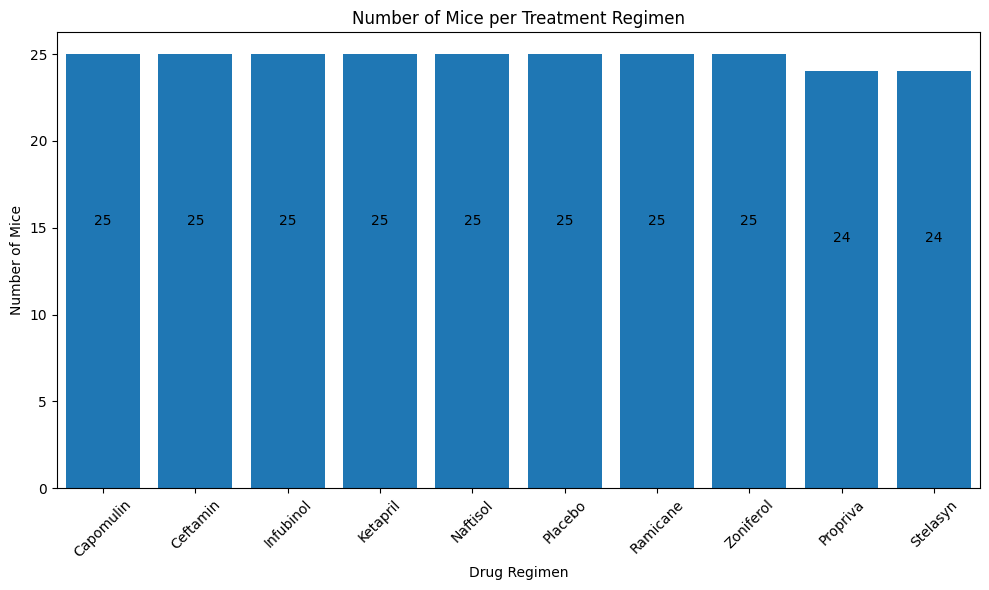

In [10]:
# Count how many mice were used per drug regimen
mouse_counts = Clean_Study_results.groupby("Drug Regimen")["Mouse ID"].nunique().sort_values(ascending=False)

# Create bar chart of mouse count by treatment using matplotlib
plt.figure(figsize=(10, 6)) # Using matplotlib to create figure and setting size
bars = plt.bar(mouse_counts.index, mouse_counts.values) # Using matplotlib to create bars (mouse_count.index = x-axis and mouse_counts.values = y-axis)

# Add data labels to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + (-10), int(yval), ha='center', va='bottom')

# Style and show plot
mouse_counts.plot(kind='bar')
plt.title("Number of Mice per Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Task 5: Generate a pie plot that shows the distribution of female or male mice in the study.

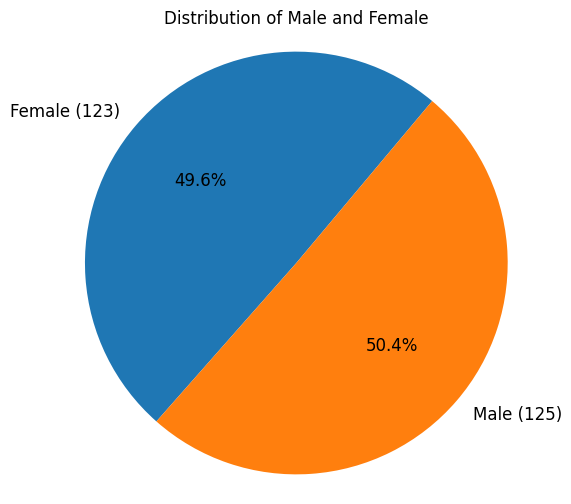

In [12]:
# Count male and female mice in the study
gender_counts = Clean_Study_results.groupby("Sex")["Mouse ID"].nunique()

# Pie chart distribution of male and female mice
plt.figure(figsize=(6, 6)) # Using matplotlib to create figure and sizing
plt.pie( # Creating piechart
    gender_counts.values, # Retrieving values
    labels=[f"{label} ({count})" for label, count in zip(gender_counts.index, gender_counts.values)], # add labels
    autopct='%1.1f%%', # Creating percentages
    startangle=50, # starting angle for the split
    textprops={'fontsize': 12} #Fontsize
)
plt.title("Distribution of Male and Female") # Title
plt.axis('equal') # Adding the values
plt.show() # Printing

# Task 6: Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin.

In [13]:
# Choose four specific treatments for deeper analysis
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] # Filtering for regimens
filtered_df = Clean_Study_results[Clean_Study_results["Drug Regimen"].isin(selected_regimens)] # Input select drug regimens and put into dataframe

# Identify final timepoint for each mouse
final_timepoints = filtered_df.groupby("Mouse ID")["Timepoint"].max().reset_index() # Get final timepoint for each mouse

# Merge with tumor volume data to get last recorded tumor size
final_volumes = pd.merge(final_timepoints, filtered_df, on=["Mouse ID", "Timepoint"], how="left") # Merging mouse id with final timepoint

# Create final summary table
final_volumes_table = final_volumes[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]].sort_values(by=["Drug Regimen", "Mouse ID"]) # Format of the table
final_volumes_table.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,b128,Capomulin,45,38.982878
12,b742,Capomulin,45,38.939633
24,f966,Capomulin,20,30.485985
25,g288,Capomulin,45,37.074024
26,g316,Capomulin,45,40.159220


# Task 7: Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

<ipython-input-34-84ff6c6c613c>:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(regimen_data.values(), labels=regimen_data.keys(), flierprops=flierprops, boxprops=boxprops) # Insert values for matplotlib


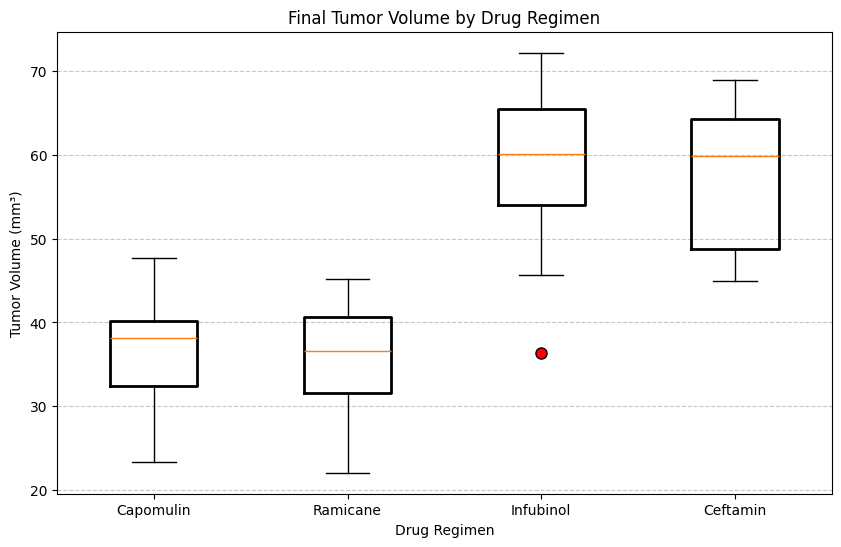

In [34]:
final_volumes = pd.merge(final_timepoints, filtered_df, on=["Mouse ID", "Timepoint"], how="left") # Get final timepoint per mouse
final_volumes_table = final_volumes[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]] # Create array of Mouse id, drug regimen, timepoint and tumor volume

# Prepare tumor volume data by treatment for boxplot
regimen_data = { # Name for data plotting
    regimen: final_volumes_table[final_volumes_table["Drug Regimen"] == regimen]["Tumor Volume (mm3)"] # Data used in the foreach loop
    for regimen in selected_regimens # Applying filter
}

# Draw box-and-whisker plot
plt.figure(figsize=(10, 6)) # Plot figure and size
boxprops = dict(linestyle='-', linewidth=2) # Defining style for boxes
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none') # Defining style for outlier

plt.boxplot(regimen_data.values(), labels=regimen_data.keys(), flierprops=flierprops, boxprops=boxprops) # Insert values for matplotlib
plt.title("Final Tumor Volume by Drug Regimen") # Title
plt.xlabel("Drug Regimen") # X-axis label
plt.ylabel("Tumor Volume (mm³)") # Y-axis label
plt.grid(axis='y', linestyle='--', alpha=0.7) # Figure grid style
plt.show() # Print

# Task 8: Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.

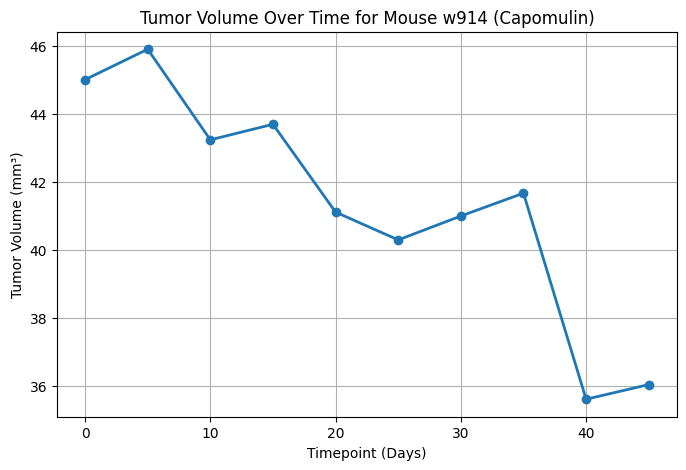

In [41]:
# Focus on Capomulin treatment
capomulin_data = Clean_Study_results[Clean_Study_results["Drug Regimen"] == "Capomulin"] # Filter out data

# Pick one random mouse from this treatment group
random_mouse_id = capomulin_data["Mouse ID"].sample(1).values[0] # Choose random mouse from filtered data
mouse_data = capomulin_data[capomulin_data["Mouse ID"] == random_mouse_id] # Retrieving all data with the same mouse id

# Line plot of tumor progression over time
plt.figure(figsize=(8, 5)) # Figure with sizing
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], # Using timepoint and tumor value from data
         marker='o', linestyle='-', linewidth=2) # Visual design values
plt.title(f"Tumor Volume Over Time for Mouse {random_mouse_id} (Capomulin)") # Title
plt.xlabel("Timepoint (Days)") # Create x axis label
plt.ylabel("Tumor Volume (mm³)") # Create y axis label
plt.grid(True) # applying grid
plt.show() # Print

# Task 9: Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

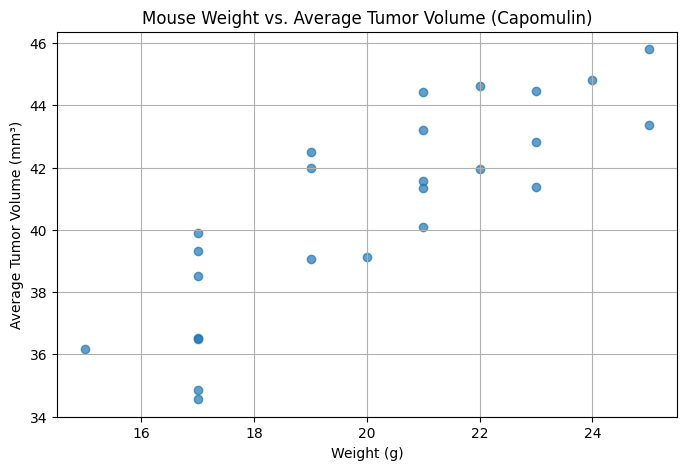

In [42]:
# Average tumor size per mouse under Capomulin
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index() # Grouping data of mouse id and tumor volume and find mean
avg_tumor_volume = avg_tumor_volume.rename(columns={"Tumor Volume (mm3)": "Avg Tumor Volume"}) # Creating column as average tumor volume

# Get corresponding weights
mouse_weights = capomulin_data[["Mouse ID", "Weight (g)"]].drop_duplicates() # Get mouse weight by mouse ID and dropping duplicates

# Merge for scatter plot
scatter_data = pd.merge(avg_tumor_volume, mouse_weights, on="Mouse ID") # Merge data by mouse ID

# Scatter plot: weight vs. tumor volume
plt.figure(figsize=(8, 5)) # Start figure and sizing
plt.scatter(scatter_data["Weight (g)"], scatter_data["Avg Tumor Volume"], alpha=0.7) # Plotting scatter data
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)") # Title
plt.xlabel("Weight (g)") # Create x axis label
plt.ylabel("Average Tumor Volume (mm³)") # Create y axis label
plt.grid(True) # Creating grid
plt.show() # Print

Task 10: Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

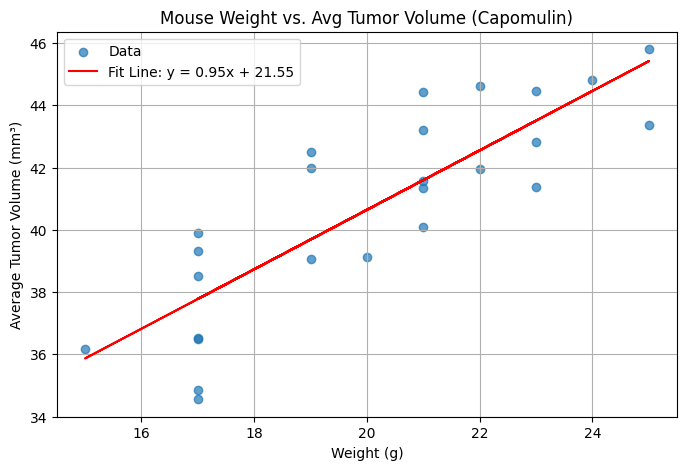

Correlation Coefficient: 0.84


In [43]:
# Perform correlation and linear regression
correlation = scatter_data["Weight (g)"].corr(scatter_data["Avg Tumor Volume"]) # Here we use scipy to calculate correlation
slope, intercept, r_value, p_value, std_err = linregress( # Here we use scipy to calculate correlation
    scatter_data["Weight (g)"], scatter_data["Avg Tumor Volume"] # Here we use scipy to calculate correlation
)
regression_line = slope * scatter_data["Weight (g)"] + intercept # Here we use scipy to create the linear regresion line

# Plot figure
plt.figure(figsize=(8, 5)) # Figure and size
plt.scatter(scatter_data["Weight (g)"], scatter_data["Avg Tumor Volume"], alpha=0.7, label="Data") # Plot scatter data
plt.plot(scatter_data["Weight (g)"], regression_line, color='red', label=f"Fit Line: y = {slope:.2f}x + {intercept:.2f}") # plotting linear regression line
plt.title("Mouse Weight vs. Avg Tumor Volume (Capomulin)") # Title
plt.xlabel("Weight (g)") # X axis label
plt.ylabel("Average Tumor Volume (mm³)") # Y axis label
plt.legend() # Create legend
plt.grid(True) # Make grid
plt.show() # Print

# Display correlation coefficient
print(f"Correlation Coefficient: {correlation:.2f}")